# Factories and Fakes

* You often need fake data to test against.
* You can, of course, use some sample data in your tests.
* **But what if you need `100` of records, or even `1000` of records of test data?** 
* Then it can get tedious to create and maintain.
* Sometimes you just need a fake version of a class in your program but you want to have it be realistic data that behaves like the real class.
* **Factories and fakes** make this all possible.

# Account Model

Let's say we need to test a data model that handles customer accounts.

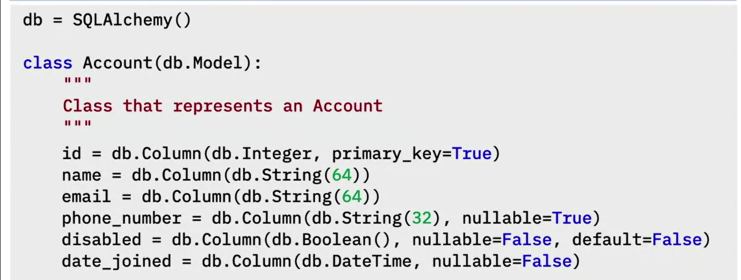

We'll start by creating this data model.

We will use a popular object relational mapper called **SQLAlchemy** and so we create a `db` instance of the **SQLAlchemy** class.

Now we build our model.

* We create a class called `Accounts` that inherits from the **base model of SQLAlchemy** (`db.Model`).
* Now we can **add our columns**, which will be **represented as class variables**.
* We add an `id`. * It will serve as a non-information bearing key so we label the `id` as the **primary key**.
* We add a `name` as a **string** and an `email` field as a **string**.
* We also add a `phone_number` as a **string**.
* We make that `phone_number` **optional**, so we set **nullable to `True`**.
* Let's add a Boolean field to determine if this account is `disabled`, and let’s make the default `False`.
* Finally, we'll add a `date_joined` column as a `DateTime` and make it **optional** as well.

***When we create our factory that produces fake accounts, these are the fields we'll expect to see.***


# Account factory with FactoryBoy

Now we're going to use a python package called **FactoryBoy** to generate our fake accounts.

Those of you who are familiar with the Ruby on Rails may have used a package called **FactoryGirl** to do the same thing.

**FactoryBoy** is just a Python version of Ruby's **FactoryGirl**.

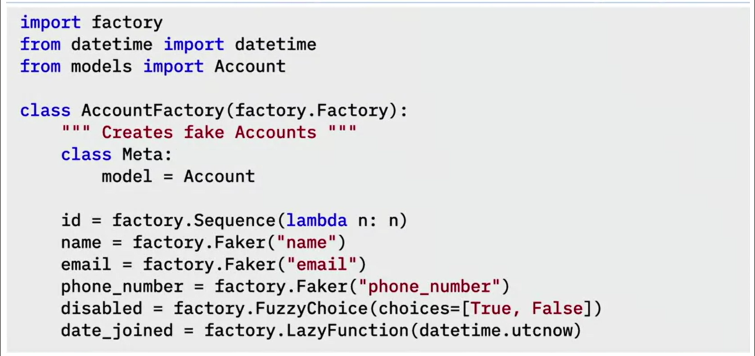

* We start by importing **FactoryBoy** which is simply called `factory`.
* We also imported `datetime` for creating **timestamps**.
* Then we import our model that we just created.
* Importing this model is important because we will use it here to provide the same functionality as the real class.
* Next we'll create an `AccountFactory` class and have it inherit from the `Factory` class in **FactoryBoy**.
* Then we create an **inner class** called `Meta` and one class attribute that is `model` equals `Account`.
* This attribute is how the factory knows which model class it creates fakes for.
* That is why we imported the `Account` class from models.

**Finally, we add the same attributes that the original class has but we substitute fake versions of these attributes.**

We'll start with an `id`.
* Because it is a non-information bearing key and most databases just use a sequence as the primary key.
* We will use the `factory.Sequence` class to provide an increasing sequence number each time this field is called.

Next we'll add a `name` and we take advantage of the fact that **FactoryBoy** includes the **Faker** class.
* With **Faker**, we can generate fake data for a set of providers that Faker knows about.
* It has a provider for `name` so we'll just use that.
* You just instantiate a **Faker** object passing it the provider “`name`” as a parameter in the constructor.

Next we add an `email` field and **Faker** also has a provider for fake emails so we'll use that.

Next field we make is `phone_number` and luckily **Faker** supports `phone_number` provider as well so we use that.

The next field we make is the `disabled` field.
* **Faker** doesn't have a provider for **Booleans**, but **FactoryBoy** has a method called `FuzzyChoice` which randomly chooses between options we give it.
* We could pass a list of values to `FuzzyChoice` property and `FuzzyChoice` will select one randomly from the list.
* This is great when you need data that doesn't have a provider.
* For our case we will give it the only two values that a **Boolean** can be: `True` and `False`.

Finally we add the `date_joined` field.
* Here we use the `datetime` class as a parameter to the `LazyFunction` method, which only generate the **timestamp** when the `AccountFactory` is created.
* This way, if we create five accounts they will have five different **timestamps** for `date_joined`.


# Using account fakes

We're now ready to use our `AccountFactory` in our unit testing.

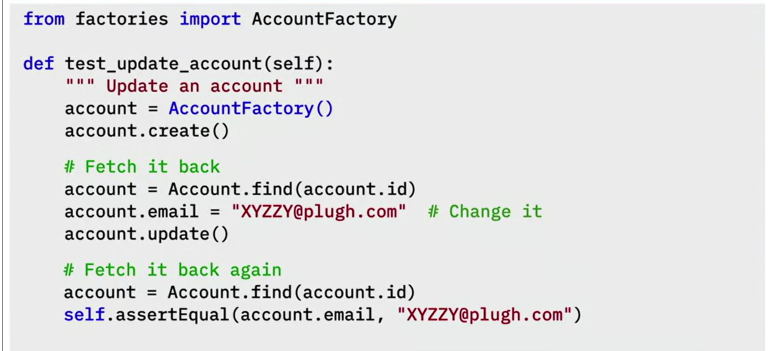

We start by importing `AccountFactory` from `factories` module.

Then we create a test case called `test_update_account`.

Here we instantiate an `AccountFactory` and assign it to a variable called `account`.

Next we'll call the `create()` method on the `account`.
* You might be asking yourself, **"How can we call a method on a fake class?"** 
* Because `AccountFactory` doesn't have any methods.
* Remember how we used that **inner class** called `Meta` and assigned the `model` variable to our **"real"** `Account` class? 
* This allows the `AccountFactory` to behave exactly like a **real account**.
* Now any method that you can call on the `Account` class, you can also call on the `AccountFactory` class.
* It is truly a **"body double"** or **"stand-in"** for an account.

Next we retrieve the account that we just created.

We set a new value for the `email` to a value that we know won’t show up in the test data, and then we call `update()` method to save this new email.

Finally, we retrieve the account from the database one more time, and we `assert` that the email that was saved matches the email that we set it to.

**Faking** account data is that simple.

Anywhere you can use an `Account`, you can now use an `AccountFactory` and have instant sample data.

Any method that you can call on `Account`, you can also call on `AccountFactory` because it behaves exactly the same as a real `Account`, even though it's a fake.


# Faker provider

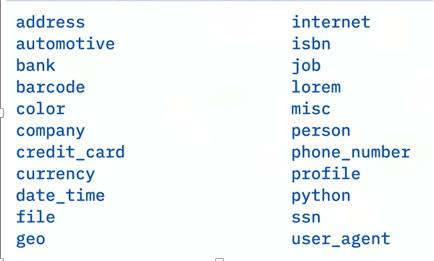

Here are the standard providers that the **Fake** class supports.

You can see that there are `address` providers, `automotive` providers, `bank` providers, a host of other providers to help you build sample data for your applications.

There are even **community providers** that expand on this list.

# Fake names, companies and jobs

Let's take a look at some of these providers.

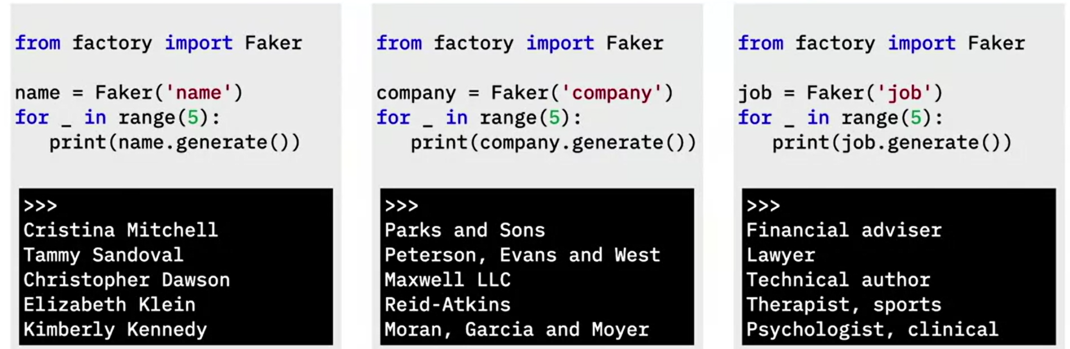

We'll start by importing `Faker` from the `factory` package.

Then we create an instance of `Faker` that will produce names.
* To do this, we pass in the **provider `name`**, in this case "`name`", to the `Faker()` class and store it in a variable called `name`.
* Next we create a loop that iterates five times and calls `name.generate()` to generate a name each time through the loop.
* When we execute this code we see **5 random names**:
    * *Cristina Mitchell*,
    * *Tammy Sandoval*,
    * *Cristopher Dawson*,
    * *Elizabeth Dawson*, and
    * *Kimberly Kennedy*.

Let's go through this process again but with a different provider.
* This time we'll use the **`company` provider** by creating an instance of **Faker** passing in "`company`" as the provider name.
* Again, we'll create a loop and generate **5 fake companies**.
* When we execute this code we get:
    * *Parks and Sons*
    * *Peterson, Evans and West*
    * *Maxwell LLC*
    * *Reid-Atkins*
    * *Moran, Garcia and Moyer*

Let's try one more time, using the **"`job`" provider**.
* When we execute this code we get **5 job names** like:
    * *Financial adviser*
    * *Technical author*
    * *Lawyer*
    * *Therapist, sports*
    * *Psychologist, clinical*
* By using fakes we can create:
    * **Cristina Mitchell** who works for **Parks and Sons** as a **financial advisor**; 
    * or **Tammy Sandoval**, who works for **Peterson, Evans and West** as a **lawyer**;
    * or any number of people, companies, and jobs; 
    * or any combination of any of the providers.

And I'm not Faking!

# Fuzzy attributes

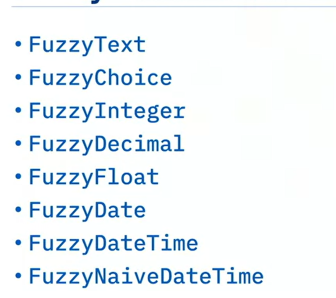

You may have noticed that we used a function called `FuzzyChoice` in our example.

I just want to make you aware that there are **fuzzy attributes** for a number of data types like **text**, **integers**, **decimals**, **floats**, **dates**, and various timestamps just to name a few.

With a library like `FactoryBoy`, you can create realistic sample data for almost anything that you need to test for.
